
 <h1 style="text-align:center;">Machine Learning for Programmers</h1>
 <h2 style="text-align:center;">Evaluating Algorithms (Part 1)</h2>
 <h3 style="text-align:center;">Dr. Matthias Hölzl</h3>

 # What's the goal of ML

 Turning raw data into usable information...

 - ... by analyzing the data or looking at examples
 - ... so that our results improve if we provide additional data


 # How does this look like?

 - Data:

   - Many items (100s to billions)

   - Fixed set of features per item (10s to thousands / millions)

 - Information:

   - Assign a number to each item

     - From a small fixed set (clustering, classification)

     - From an (in theory) infinite set (regression)

   - Generate a complex output for each item

     - translation, text generation (GPT-2/3, T5)

     - images based on text, other images (Dall-E)

 # Classifying Approaches to ML

 ## By Data/Environment Provided

 - Unsupervised

 - Supervised

 - Reinforcement


 But also...

 - Semi-supervised / weakly supervised

 - Self-supervised

 ## By solution algorithm

 - Parametric: Try to compress training data into settings for a fixed number
   of parameters

   - Linear and logistic regression

   - Neural networks

 - Non-parametric: Do not try to represent the training data as a fixed number
   of parameters

    - K-nearest-neighbors

    - Decision trees

    - Support Vector Machines

 - Both have hyperparameters

 # Parameters vs. Hyperparameters

 - Hyperparameters are values that the designer sets before instantiating the
   algorithm:

   - Architecture and number of nodes in a neural network

 - Parameters are values that the algorithm sets during training (fitting)

   - Slope of the solution line in linear regression

 ## Supervised Learning: Training a DL Classifier

 <br/>
 <img src="img/ag/Figure-01-008.png" style="width: 100%;"/>

 ## Supervised Learning: Evaluation/Test

 <img src="img/ag/Figure-01-009.png" style="width: 70%; padding: 20px;"/>

 ## Clustering

 <img src="img/ag/Figure-01-013.jpg" style="float: right;width: 40%;"/>

 - Many documents
 - Figure out which ones are "similar"

 Clustering is often done via unsupervised methods.

 ## Classification

 <img src="img/ag/Figure-01-022.png" style="float: right;width: 40%;"/>

 - Many documents, fixed set of labels
 - Assign one or more labels to each document

 ## Regression

 <img src="img/ag/Figure-01-011.png" style="float: right;width: 40%;"/>

 - Learn numerical relationships
 - "How does salary depend on age?"

 ## Geocoding / toponym resolution

 <img src="img/france.jpg" style="float: right;width: 40%;"/>

 <div style="float: left; width: 60%;">

 <br/>

 - Figure out coordinates from occurrences of names in text
 - Reverse geocoding: Figure out place name from coordinates
 </div>

 ## (Extractive) Question Answering

 <img src="img/question-mark.jpg" style="float: right;width: 30%;"/>


 - One document, one question about the document
 - Extract the answer from the document

# Evaluating Regression Performance

How can we determine the quality of our solution for a regression problem?

<img src="img/ag/Figure-09-008.png" style="width: 40%; padding: 20px;"/>

<img src="img/ag/Figure-09-009.png" style="width: 80%; padding: 20px;"/>

<img src="img/ag/Figure-09-010.png" style="width: 40%; padding: 20px;"/>

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [39]:
rng = np.random.default_rng(42)
x = rng.uniform(size=(150, 1), low=0.0, high=10.0)
x[:10]

array([[7.73956049],
       [4.3887844 ],
       [8.5859792 ],
       [6.97368029],
       [0.94177348],
       [9.75622352],
       [7.61139702],
       [7.86064305],
       [1.28113633],
       [4.50385938]])

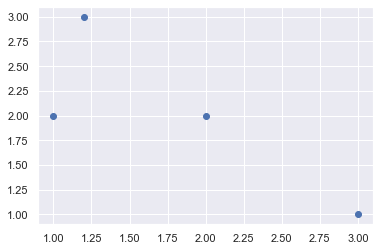

In [40]:
plt.scatter([1, 2, 3, 1.2], [2, 2, 1, 3])

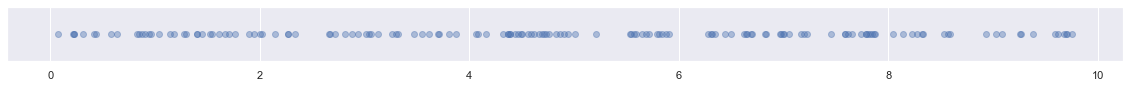

In [41]:
plt.figure(figsize=(20, 1), frameon=False)
plt.yticks([], [])
plt.scatter(x, np.zeros_like(x), alpha=0.4);

In [48]:
def lin(x):
    return 0.85 * x - 1.5

In [43]:
def fun(x):
    return 2 * np.sin(x) + 0.1 * x ** 2 - 2

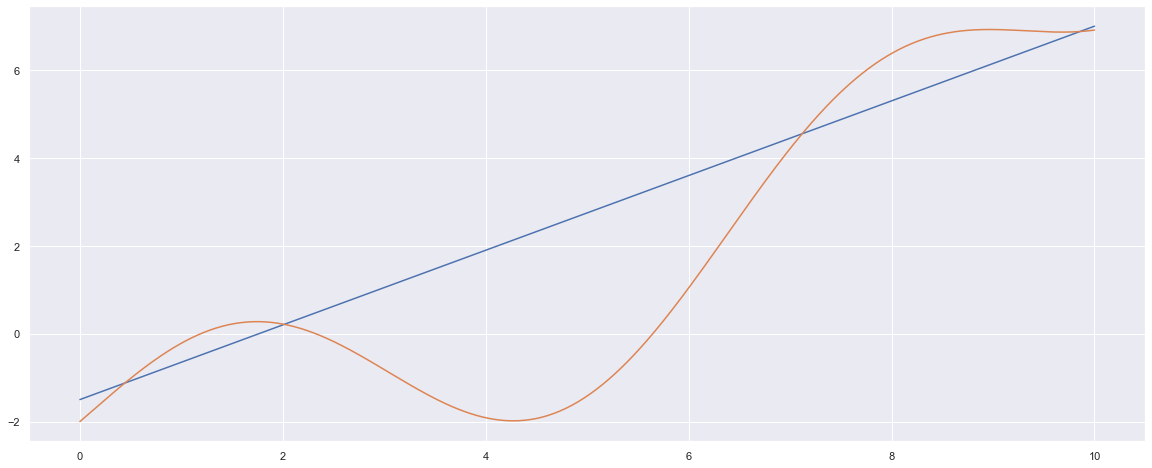

In [51]:
x_plot = np.linspace(0, 10, 500)

plt.figure(figsize=(20, 8))
sns.lineplot(x=x_plot, y=lin(x_plot))
sns.lineplot(x=x_plot, y=fun(x_plot));

In [53]:
def randomize(fun, x):
    return fun(x) + rng.normal(size=x.shape, scale=0.5)

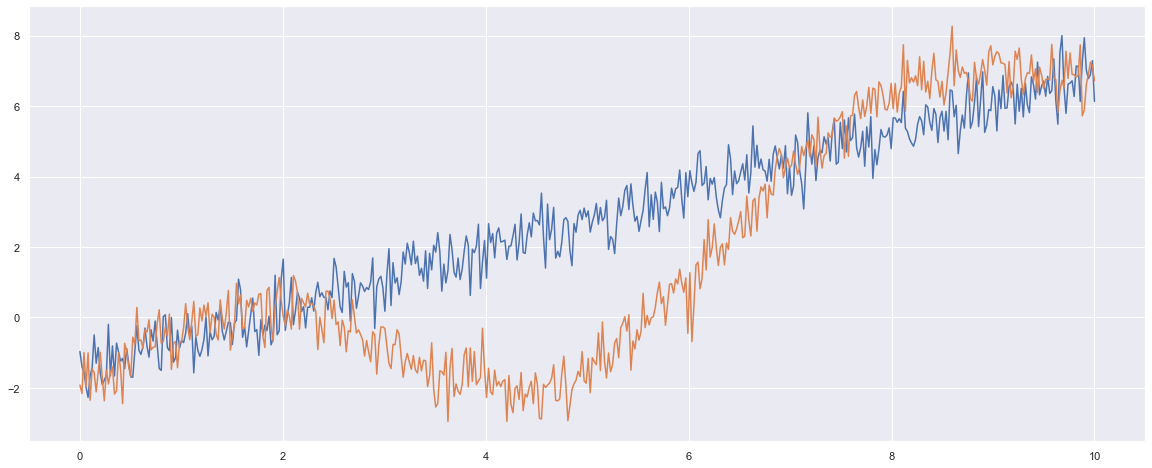

In [54]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=x_plot, y=randomize(lin, x_plot))
sns.lineplot(x=x_plot, y=randomize(fun, x_plot));

<AxesSubplot:>

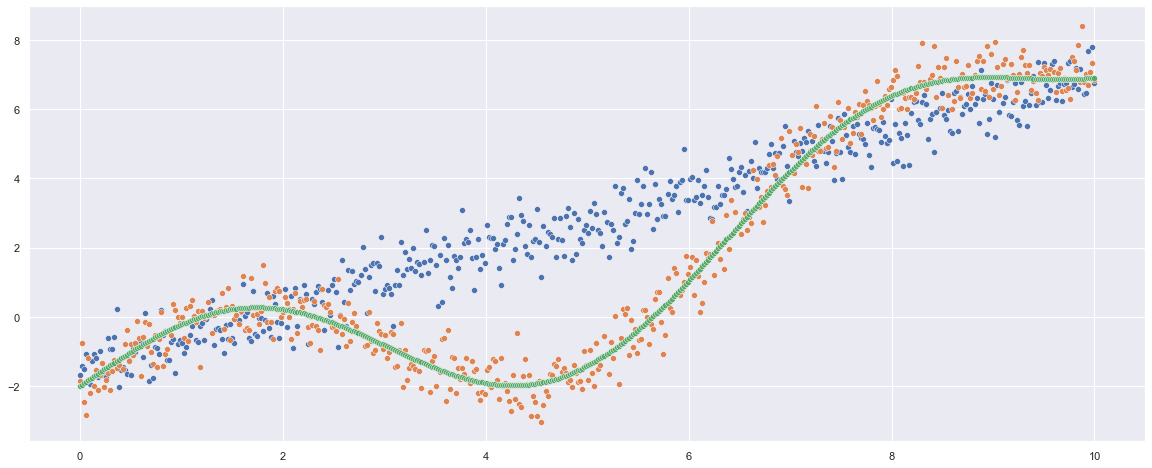

In [56]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x=x_plot, y=randomize(lin, x_plot))
sns.scatterplot(x=x_plot, y=randomize(fun, x_plot));
sns.scatterplot(x=x_plot, y=fun(x_plot))

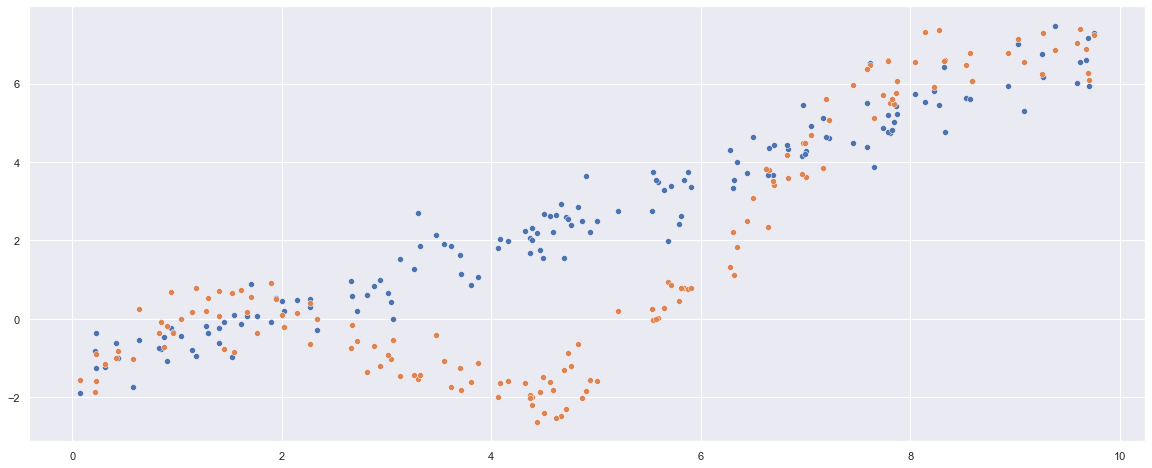

In [58]:
plt.figure(figsize=(20, 8))
x_vec = x.reshape(-1)
sns.scatterplot(x=x_vec, y=randomize(lin, x_vec))
sns.scatterplot(x=x_vec, y=randomize(fun, x_vec));

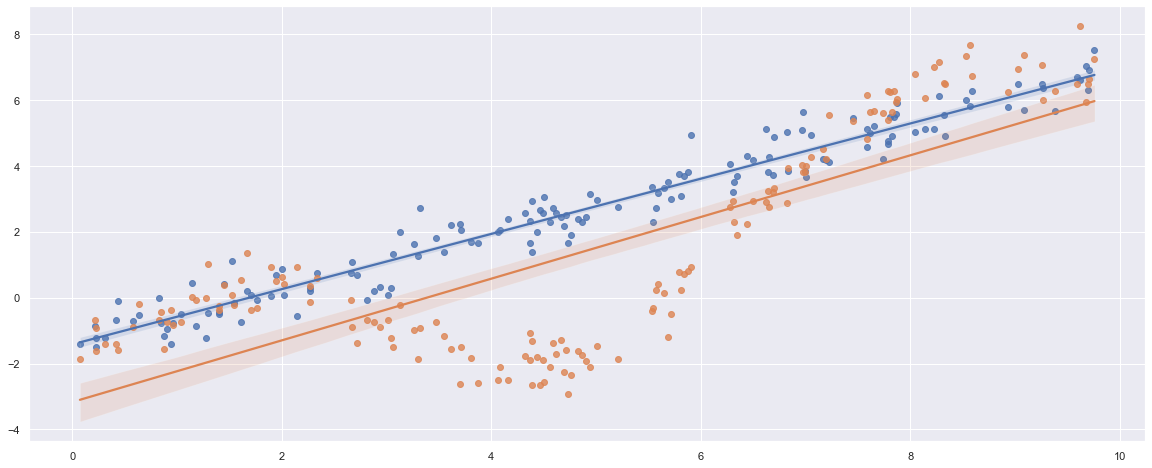

In [59]:
plt.figure(figsize=(20, 8))
x_vec = x.reshape(-1)
sns.regplot(x=x_vec, y=randomize(lin, x_vec))
sns.regplot(x=x_vec, y=randomize(fun, x_vec));

## Fitting a Linear Regressor

In [60]:
x_train, x_test = x[:100], x[100:]
y1_train = randomize(lin, x_train).reshape(-1)
y1_test = randomize(lin, x_test).reshape(-1)
y2_train = randomize(fun, x_train.reshape(-1))
y2_test = randomize(fun, x_test).reshape(-1)

In [61]:
x_train.shape, x_test.shape, y1_train.shape, y1_test.shape, y2_train.shape, y2_test.shape

((100, 1), (50, 1), (100,), (50,), (100,), (50,))

In [62]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(x_train, y1_train)
lr1_pred = lr1.predict(x_test)

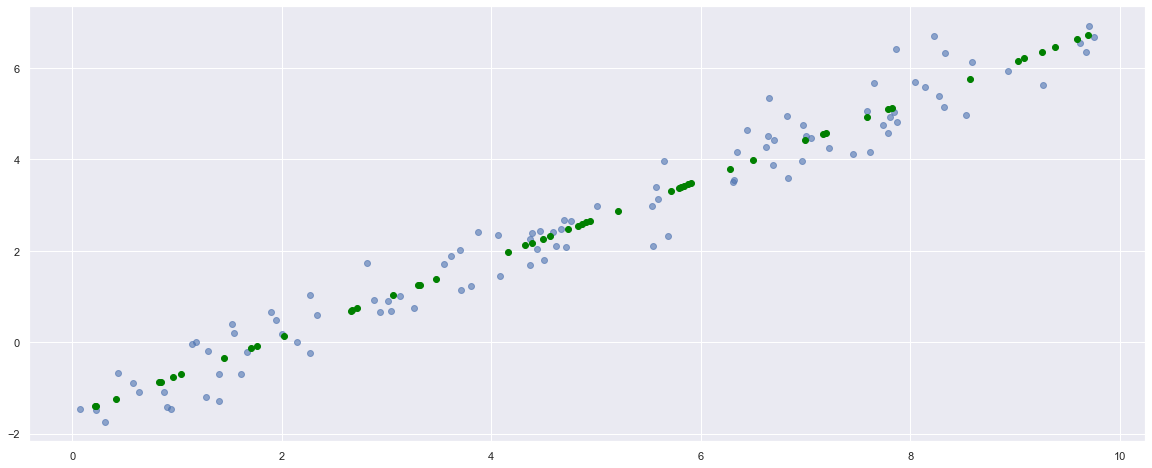

In [64]:
plt.figure(figsize=(20, 8))
plt.scatter(x_train, y1_train, alpha=0.6);
plt.scatter(x_test, lr1_pred, c="green");
plt.plot(x_test, lr1_pred, c="red")
plt.scatter(x_test, y1_test, c="orange");

## Computing the Error:

First try: Compute distance between prediction and true values:

In [ ]:
error_per_sample = y1_test - lr1_pred
error = error_per_sample.mean()
error

The positive and negative error cancel out!

Better: try with absolute distance or squared distance:

In [ ]:
abs_error_per_sample = np.abs(y1_test - lr1_pred)
square_error_per_sample = (y1_test - lr1_pred) ** 2

abs_error_per_sample.mean(), square_error_per_sample.mean()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y1_test, lr1_pred), mean_squared_error(y1_test, lr1_pred)

## Linear Regression and Non-Linear Relations

In [ ]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(x_train, y2_train)
lr2_pred = lr2.predict(x_test)

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(x_train, y2_train)
plt.plot(x_test, lr2_pred, c="red")
plt.scatter(x_test, lr2_pred, c="green");
plt.scatter(x_test, y2_test, c="orange");

In [ ]:
mean_absolute_error(y1_test, lr2_pred), mean_squared_error(y1_test, lr2_pred)